In [7]:
import pandas as pd
import os
from omegaconf import OmegaConf
import torch
from models.actor import InterpretableNormalActor, \
    InterpretableDirichletActor, InterpretableBetaActor, \
    InterpretableDeltaActor
from utils import log_results
import seaborn as sns
actor_types = {
    'normal': InterpretableNormalActor,
    'dirichlet': InterpretableDirichletActor,
    'beta': InterpretableBetaActor,
    'delta': InterpretableDeltaActor,
}
# actor_params = args.actor.value['{}_params'.format(
#     args.actor.value.type)]
# actor_params.update(args.actor.value['shared_params'])
# actor = actor_types[args.actor.value.type](actor_params)
def get_train_eval_df(outdir):
    args = OmegaConf.load(os.path.join(outdir, 'config.yaml'))
    val_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('val_metrics')}
    train_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('train_metrics')}
    ckpt_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('ckpt')}
    rows = []
    for k in ckpt_files.keys():
        if k not in val_files.keys() or k not in train_files.keys():
            continue
        rows.append({'epoch': k, 'ckpt_file': ckpt_files[k]})
        # state_dict = torch.load(os.path.join(outdir, ckpt_files[k]), map_location='cpu')['actor']
        # actor.load_state_dict(state_dict)
        actor = None
        val_results = pd.read_csv(os.path.join(outdir, val_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, val_results, 'val', actor=actor))
        train_results = pd.read_csv(os.path.join(outdir, train_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, train_results, 'train', actor=actor))
    df = pd.DataFrame(rows)
    best_row = df.sort_values('val_auroc_macro')[['epoch', 'val_auroc_macro', 'ckpt_file']].iloc[-1]
    print('best model path:', os.path.join(outdir, best_row.ckpt_file))
    print(best_row)
    return df, best_row

/work/frink/mcinerney.de/envs/ehragent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/ckpt_epoch=145_updates=1160.pt
epoch                                         145
val_auroc_macro                          0.816176
ckpt_file          ckpt_epoch=145_updates=1160.pt
Name: 10, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

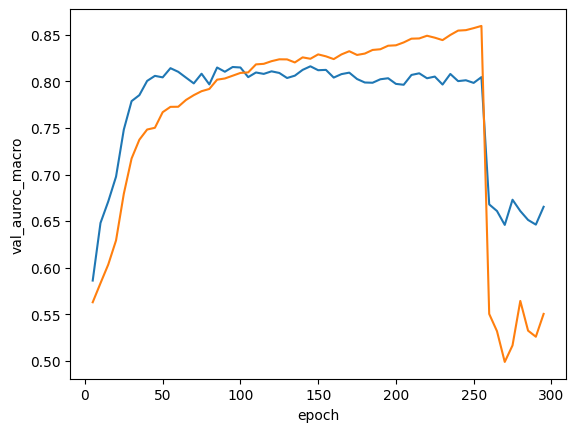

In [6]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/ckpt_epoch=95_updates=679.pt
epoch                                        95
val_auroc_macro                          0.7903
ckpt_file          ckpt_epoch=95_updates=679.pt
Name: 133, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

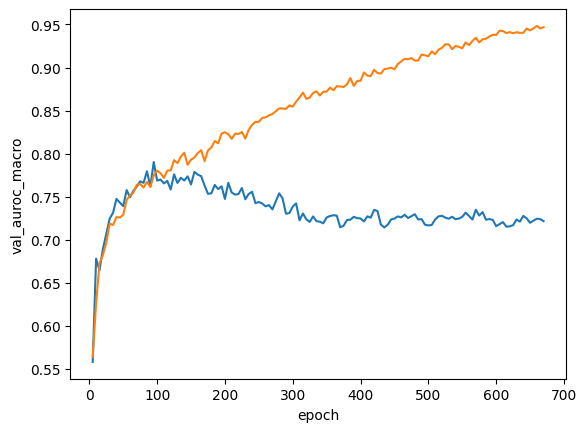

In [7]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/ckpt_epoch=150_updates=1200.pt
epoch                                         150
val_auroc_macro                          0.784637
ckpt_file          ckpt_epoch=150_updates=1200.pt
Name: 51, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

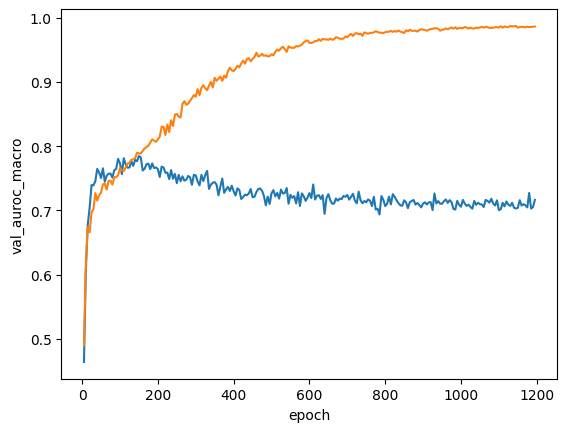

In [8]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/ckpt_epoch=85_updates=680.pt
epoch                                        85
val_auroc_macro                        0.828801
ckpt_file          ckpt_epoch=85_updates=680.pt
Name: 30, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

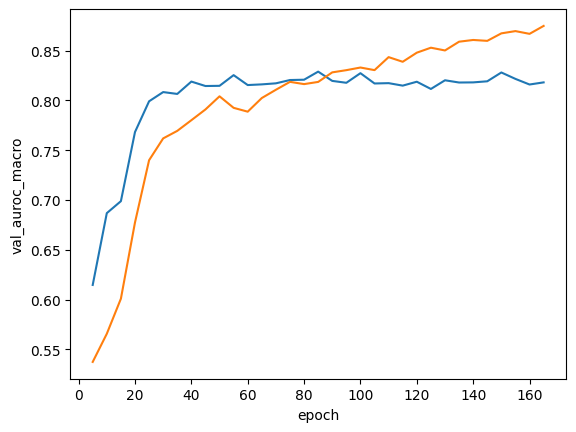

In [139]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/ckpt_epoch=65_updates=520.pt
epoch                                        65
val_auroc_macro                        0.797324
ckpt_file          ckpt_epoch=65_updates=520.pt
Name: 36, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

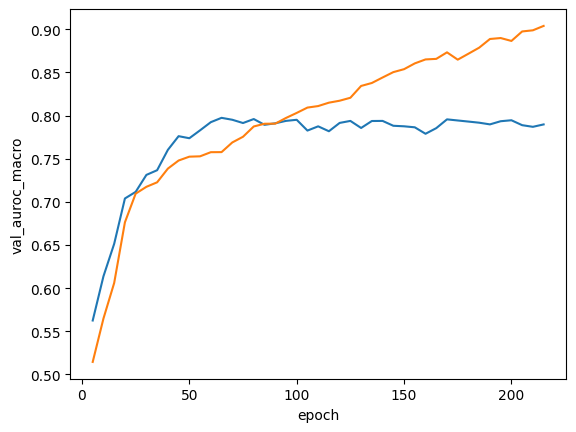

In [140]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

In [141]:
def f1(p, r):
    return 2*p*r/(p + r)
def plot_model_performance(model_outputs):
    rows = []
    for model_name, output_paths in model_outputs.items():
        for output_path in output_paths:
            args = OmegaConf.load(os.path.join(
                '/'.join(output_path.split('/')[:-1]), 'config.yaml'))
            rows.append({
                'model': model_name, 'file': output_path,
                'seed': int(output_path.split('_seed=')[1].split('_')[0]),
                'Interpretable': 'Interpretable' if not model_name.endswith('predictor') else 'Not Interpretable',
            })
            # state_dict = torch.load(os.path.join(outdir, ckpt_files[k]), map_location='cpu')['actor']
            # actor.load_state_dict(state_dict)
            actor = None
            if os.path.exists(output_path):
                df = pd.read_csv(output_path)
                rows[-1].update(log_results(
                    args.env.value.reward_type, df, 'test', actor=actor))
                rows[-1]['test_f1_macro'] = f1(
                    rows[-1]['test_precision_macro'],
                    rows[-1]['test_recall_macro'])
    return pd.DataFrame(rows)


In [142]:
results = plot_model_performance(dict(
    all_sentences=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=4_steps.csv",
    ],
    llm_evidence=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=4_steps.csv",
    ],
    llm_evidence_bert_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=4_steps.csv",
    ],
    longformer_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=4_steps.csv",
    ],
    bert_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=4_steps.csv",
    ]
))
model_names = {
    'all_sentences': 'Raw EHR',
    'llm_evidence': 'LLM Evidence',
    'llm_evidence_bert_predictor': 'LLM Evidence\n(BERT)',
    'bert_predictor': 'Raw EHR\n(BERT)',
    'longformer_predictor': 'Raw EHR\n(Longformer)',
}
rename_columns = {
    'test_auroc_macro': 'AUROC',
    'test_precision_macro': 'Precision',
    'test_recall_macro': 'Recall',
    'test_f1_macro': 'F1',
}
model_order = [
    'Raw EHR\n(BERT)',
    'Raw EHR\n(Longformer)',
    'Raw EHR',
    'LLM Evidence\n(BERT)',
    'LLM Evidence',
]
results['Model'] = results['model'].apply(lambda x: model_names[x])
results = pd.concat([
    results[results['Model'] == m]
    for m in model_order
])
results = results.rename(columns=rename_columns)
results

,model,file,seed,Interpretable,test_bce_loss_micro,test_auroc_micro,pulmonary edema/test_bce_loss,pulmonary edema/test_auroc,cancer/test_bce_loss,cancer/test_auroc,...,cancer/test_precision,cancer/test_precision_det,cancer/test_recall,cancer/test_recall_det,pneumonia/test_precision,pneumonia/test_precision_det,pneumonia/test_recall,pneumonia/test_recall_det,F1,Model
20,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Not Interpretable,0.445109,0.776133,0.636642,0.701427,0.191792,0.878199,...,0.563107,0.563107,0.506550,0.506550,0.228685,0.228685,0.433584,0.433584,0.429366,Raw EHR\n(BERT)
21,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,1,Not Interpretable,0.446603,0.773014,0.638031,0.697246,0.195201,0.870536,...,0.546988,0.546988,0.495633,0.495633,0.230366,0.230366,0.441103,0.441103,0.426007,Raw EHR\n(BERT)
22,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,2,Not Interpretable,0.446836,0.772481,0.640067,0.694099,0.192195,0.874485,...,0.567961,0.567961,0.510917,0.510917,0.225380,0.225380,0.427318,0.427318,0.427604,Raw EHR\n(BERT)
23,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,3,Not Interpretable,0.446146,0.773483,0.635231,0.699648,0.194263,0.874606,...,0.548611,0.548611,0.517467,0.517467,0.219496,0.219496,0.414787,0.414787,0.422259,Raw EHR\n(BERT)
24,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.446575,0.772296,0.637720,0.697475,0.194136,0.871647,...,0.543943,0.543943,0.500000,0.500000,0.227690,0.227690,0.434837,0.434837,0.422445,Raw EHR\n(BERT)
15,longformer_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Not Interpretable,0.412795,0.816534,0.587672,0.746099,0.197497,0.906462,...,0.496063,0.496063,0.687773,0.687773,0.285117,0.285117,0.427318,0.427318,0.447795,Raw EHR\n(Longformer)
16,longformer_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,1,Not Interpretable,0.413567,0.813984,0.587918,0.740829,0.202707,0.898983,...,0.474922,0.474922,0.661572,0.661572,0.284546,0.284546,0.436090,0.436090,0.439359,Raw EHR\n(Longformer)
17,longformer_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,2,Not Interpretable,0.416790,0.811407,0.590133,0.741401,0.203457,0.901703,...,0.472477,0.472477,0.674672,0.674672,0.278239,0.278239,0.419799,0.419799,0.435637,Raw EHR\n(Longformer)
18,longformer_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,3,Not Interpretable,0.414399,0.815765,0.588395,0.744356,0.201604,0.906126,...,0.481073,0.481073,0.665939,0.665939,0.285479,0.285479,0.433584,0.433584,0.443066,Raw EHR\n(Longformer)
19,longformer_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.414089,0.813483,0.589438,0.740245,0.201920,0.901852,...,0.475078,0.475078,0.665939,0.665939,0.284641,0.284641,0.427318,0.427318,0.436997,Raw EHR\n(Longformer)


In [143]:
results[['Model', 'AUROC', 'Precision', 'Recall', 'F1']]

,Model,AUROC,Precision,Recall,F1
20,Raw EHR\n(BERT),0.759508,0.348890,0.558100,0.429366
21,Raw EHR\n(BERT),0.756110,0.344681,0.557562,0.426007
22,Raw EHR\n(BERT),0.754525,0.347857,0.554791,0.427604
23,Raw EHR\n(BERT),0.755543,0.341029,0.554284,0.422259
24,Raw EHR\n(BERT),0.755386,0.341397,0.553956,0.422445
15,Raw EHR\n(Longformer),0.797540,0.358547,0.596199,0.447795
16,Raw EHR\n(Longformer),0.796748,0.351125,0.586821,0.439359
17,Raw EHR\n(Longformer),0.793263,0.346662,0.586055,0.435637
18,Raw EHR\n(Longformer),0.799152,0.353723,0.592794,0.443066
19,Raw EHR\n(Longformer),0.795434,0.349700,0.582379,0.436997


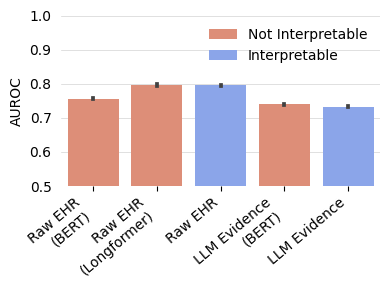

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
chart = sns.barplot(data=results,
    x='Model', y='AUROC', hue='Interpretable', dodge=False, ax=axs,
    palette=[sns.color_palette("coolwarm", 4)[3], sns.color_palette("coolwarm", 4)[0]])
chart.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
chart.yaxis.set_tick_params(width=0)
chart.set_axisbelow(True)
chart.axis([-.5, 4.5, 0.5, 1])
chart.spines['right'].set_visible(False)
chart.spines['top'].set_visible(False)
chart.spines['left'].set_visible(False)
chart.spines['bottom'].set_visible(False)
chart.legend(
    title="",
    loc="upper right",
    frameon=False,
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    # weight='bold',
    rotation=40,
)
chart.set_xlabel('')
fig.tight_layout()
fig.savefig('rp_performance.pdf')

In [151]:
import numpy as np
results_agg = results.copy()
for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
    results_agg[f'{metric} stddev'] = results_agg[metric]
results_agg = results_agg.groupby('Model').agg(dict(
    **{m: np.mean for m in ['AUROC', 'Precision', 'Recall', 'F1']},
    **{f'{m} stddev': np.std for m in ['AUROC', 'Precision', 'Recall', 'F1']},
))
results_agg

,AUROC,Precision,Recall,F1,AUROC stddev,Precision stddev,Recall stddev,F1 stddev
Model,,,,,,,,
LLM Evidence,0.733088,0.378629,0.474821,0.421302,0.002374,0.003434,0.002533,0.003080
LLM Evidence\n(BERT),0.740366,0.353051,0.505968,0.415898,0.002097,0.001310,0.002451,0.001570
Raw EHR,0.795196,0.373239,0.560723,0.448158,0.002324,0.005701,0.006409,0.005975
Raw EHR\n(BERT),0.756214,0.344771,0.555738,0.425536,0.001927,0.003601,0.001943,0.003141
Raw EHR\n(Longformer),0.796427,0.351951,0.588850,0.440571,0.002223,0.004483,0.005553,0.004925


In [152]:
latex_table = ""
for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
    latex_table += f"& {metric} "
latex_table += "\\\\\n\hline\n"
use_stddev = True
for model in model_order:
    row = results_agg.loc[model]
    latex_table += f'{model} '
    for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
        latex_table += '& {:.1f} '.format(row[metric] * 100)
        stddev = row[f'{metric} stddev'] * 100
        latex_table += ' $\pm$ '
        if stddev >= 1:
            latex_table += '{:.2f} '.format(stddev)
        else:
            latex_table += '{:.2f} '.format(stddev)[1:]
    latex_table += '\\\\\n'
print(latex_table)

& AUROC & Precision & Recall & F1 \\
\hline
Raw EHR
(BERT) & 75.6  $\pm$ .19 & 34.5  $\pm$ .36 & 55.6  $\pm$ .19 & 42.6  $\pm$ .31 \\
Raw EHR
(Longformer) & 79.6  $\pm$ .22 & 35.2  $\pm$ .45 & 58.9  $\pm$ .56 & 44.1  $\pm$ .49 \\
Raw EHR & 79.5  $\pm$ .23 & 37.3  $\pm$ .57 & 56.1  $\pm$ .64 & 44.8  $\pm$ .60 \\
LLM Evidence
(BERT) & 74.0  $\pm$ .21 & 35.3  $\pm$ .13 & 50.6  $\pm$ .25 & 41.6  $\pm$ .16 \\
LLM Evidence & 73.3  $\pm$ .24 & 37.9  $\pm$ .34 & 47.5  $\pm$ .25 & 42.1  $\pm$ .31 \\

